H_trueとH_optのL1ノルムなどを比較して、足すべき正則化項を探る

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import localConfig

In [2]:
def matrix_to_tensor(H, m, n):
    H_tensor = np.zeros((m, m, n, n))
    for i in range(m):
        for j in range(m):
            for k in range(n):
                for l in range(n):
                    H_tensor[i, j, k, l] = H[i * m + j, k * n + l]
    return H_tensor

In [4]:
m = 128
n = 64

H1 = np.load(localConfig.DATA_PATH + '/systemMatrix/H_matrix_true.npy')
H1t = matrix_to_tensor(H1, m, n)
np.save(localConfig.DATA_PATH + '/systemMatrix/H_tensor_true.npy', H1t)
# H1t = np.load(localConfig.DATA_PATH + "/240519/systemMatrix/H_tensor_true.npy")

DATE = '240718'
SETTING = 'hadamard_l1_p-10_lmd1-1_lmd2-1'
H2 = np.load(localConfig.DATA_PATH + f"/{DATE}/systemMatrix/H_matrix_{SETTING}.npy")
H2t = matrix_to_tensor(H2, m, n)
np.save(localConfig.DATA_PATH + f"/{DATE}/systemMatrix/H_tensor_{SETTING}.npy", H2t)
# H2t = np.load(localConfig.DATA_PATH + f"/{DATE}/systemMatrix/H_tensor_{SETTING}.npy")

norm_array1 = np.zeros((m, m))
norm_array2 = np.zeros((m, m))


def l1_norm(matrix):
    return np.sum(np.abs(matrix))


def l2_norm(matrix):
    return np.linalg.norm(matrix, 'fro')


def nuclear_norm(matrix):
    return np.sum(np.linalg.svd(matrix, compute_uv=False))


def rank(matrix):
    return np.linalg.matrix_rank(matrix)


def max_eigenvalue(A):
    eigenvalues, eigenvectors = np.linalg.eig(A)
    return np.max(eigenvalues)


# Calculate the element-wise L1 norm for each n x n matrix and store it in the output array
# for i in range(m):
#     for j in range(m):
#         L1norm_array1[i, j] = nuclear_norm(H1t[i, j, :, :])
#         L1norm_array2[i, j] = nuclear_norm(H2t[i, j, :, :])

for i in range(m):
    for j in range(m):
        norm_array1[i, j] = l1_norm(H1t[i, j, :, :])
        norm_array2[i, j] = l1_norm(H2t[i, j, :, :])

<Axes: >

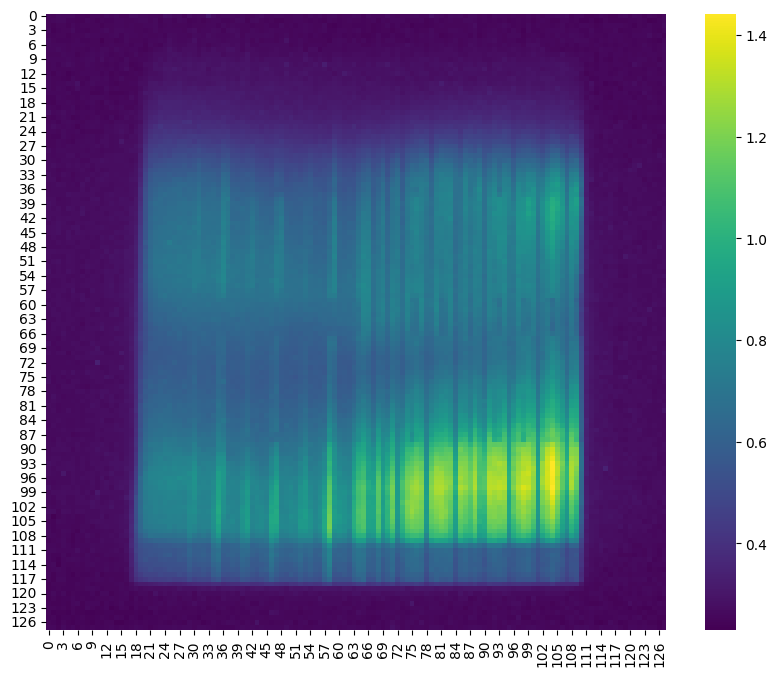

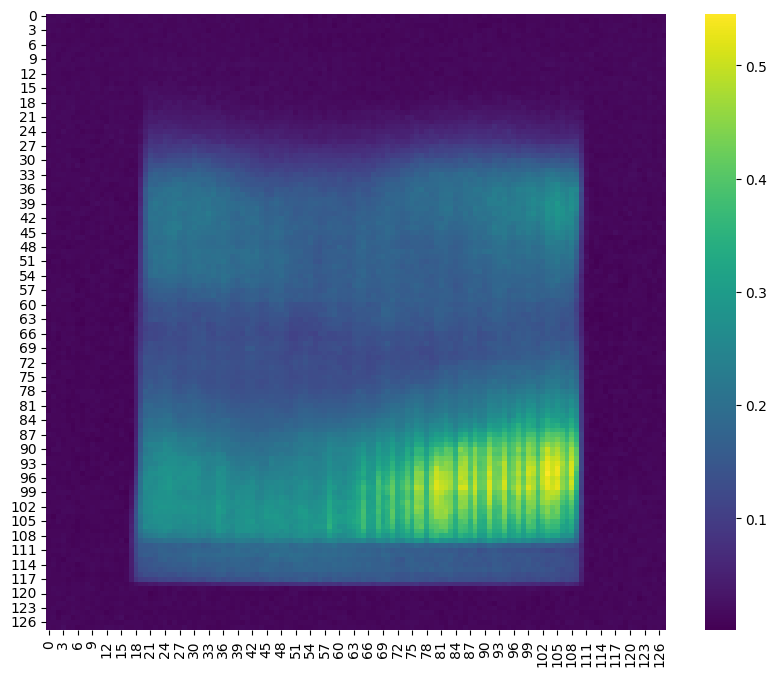

In [5]:
# norm_array1[:, 0] = 0
# norm_array2[:, 0] = 0
plt.figure(figsize=(10, 8))
sns.heatmap(norm_array1, annot=False, cmap='viridis')

plt.figure(figsize=(10, 8))
sns.heatmap(norm_array2, annot=False, cmap='viridis')